In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt')

In [3]:
house.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
house.shape

(645, 8)

In [5]:
house.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [7]:
house.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [8]:
x = house.iloc[:,[-2,-1]].values

In [9]:
from sklearn.cluster import KMeans

In [10]:
k_score = []

In [11]:
for i in range (1,15):
    km = KMeans(n_clusters=i,init='random',random_state=42)
    km.fit(x)
    k_score.append(km.inertia_)

C:\Users\mdfai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


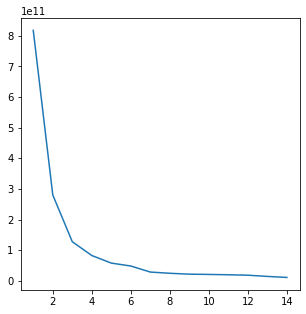

In [12]:
plt.figure(figsize=(5,5))
plt.plot(range(1,15),k_score)
plt.show()

In [13]:
km = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [14]:
labels = km.fit_predict(x)

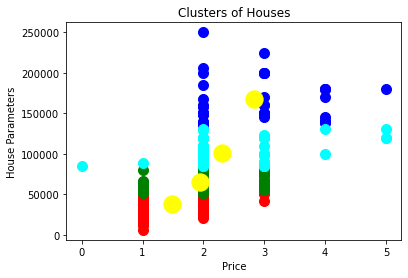

In [15]:
plt.scatter(x[labels==0, 0], x[labels==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(x[labels==1, 0], x[labels==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(x[labels==2, 0], x[labels==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(x[labels==3, 0], x[labels==3, 1], s=100, c='cyan', label ='Cluster 4')


plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Houses')
plt.xlabel('Price')
plt.ylabel('House Parameters')
plt.show()